# Uppercase Letter Classification

Letter classification project, led by Mikołaj Czachorowski, a Systems Engineering student at Politechnika Wrocławska, involves analyzing data and making crucial decisions about preprocessing techniques. The project emphasizes the task of optimizing a Convolutional Neural Network model, necessitating careful performance-related decisions.

In [3]:
# imports
import numpy as np
import tensorflow as tf

from data_processor import DataAugmentor, DataProcessor
from cnn_model import CnnModel

In [20]:
# datasets
X_train = np.load('C:\\Users\\mikol\\Downloads\\X_train.npy.zip')
y_train = np.load('C:\\Users\\mikol\\Downloads\\y_train.npy.zip')
X_val = np.load('C:\\Users\\mikol\\Downloads\\X_val.npy.zip')
y_val = np.load('C:\\Users\\mikol\\Downloads\\y_val.npy')
X_test = np.load('C:\\Users\\mikol\\Downloads\\X_test.npy.zip')

y_train = y_train['y_train']
X_train = X_train['X_train']

y_val = y_val
X_val = X_val['X_val']

X_test = X_test['X_test']

## Data Preprocessing

In [21]:
print(len(X_train))
print(len(X_val))
print(len(X_test))

151166
37792
31346


In [22]:
# data balance check in X_train and y_train
Processor = DataProcessor(X_train, y_train, 26, 6000, DataAugmentor())
Processor.data_info()

(151166, 28, 28)
(151166, 26)


True

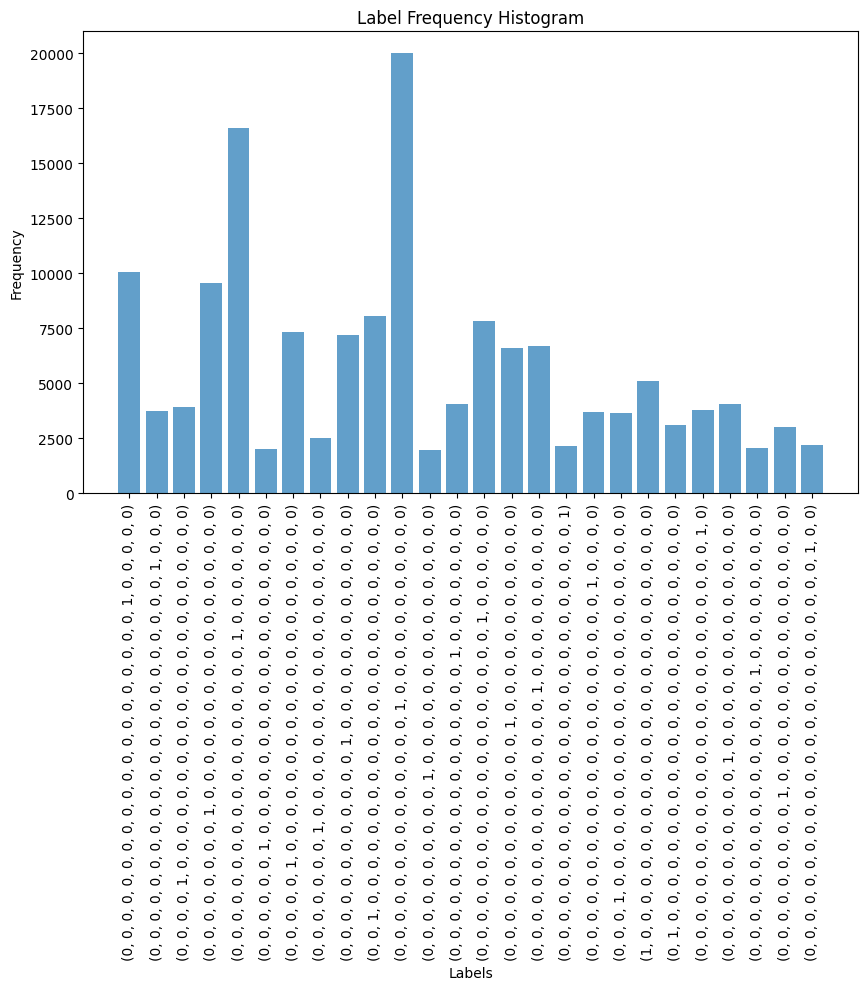

In [23]:
# initial frequency of each class
Processor.frequency_histogram()

The histogram above shows that the X_train dataset isn't evenly distributed, so I opted to reduce the number of samples for each letter class to 6000. I believe this number provides enough data for our analysis. To do this, I used a custom Processor class designed for this project, making sure we have a balanced dataset for our study.

In [25]:
# under sampling to threshold value = 6000
Processor.under_sample()
Processor.data_info()

(127786, 28, 28)
(127786, 26)


True

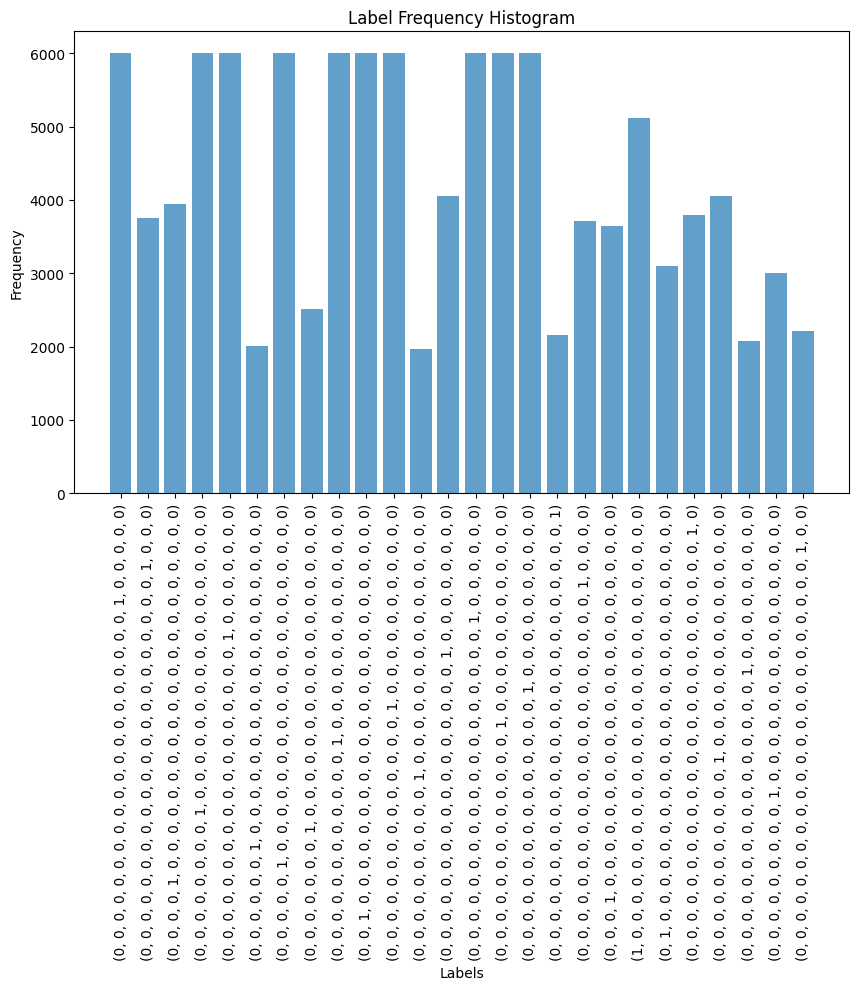

In [ ]:
# frequency of each class after under sampling
Processor.frequency_histogram()

To fill up the letters with fewer than 6000 images, I used the oversample method from the Processor class. This method employs data augmentation techniques to create additional samples for those letters.

In [ ]:
# over sampling to threshold value = 6000
Processor.over_sample()
Processor.data_info()

(156000, 28, 28)
(156000, 26)


True

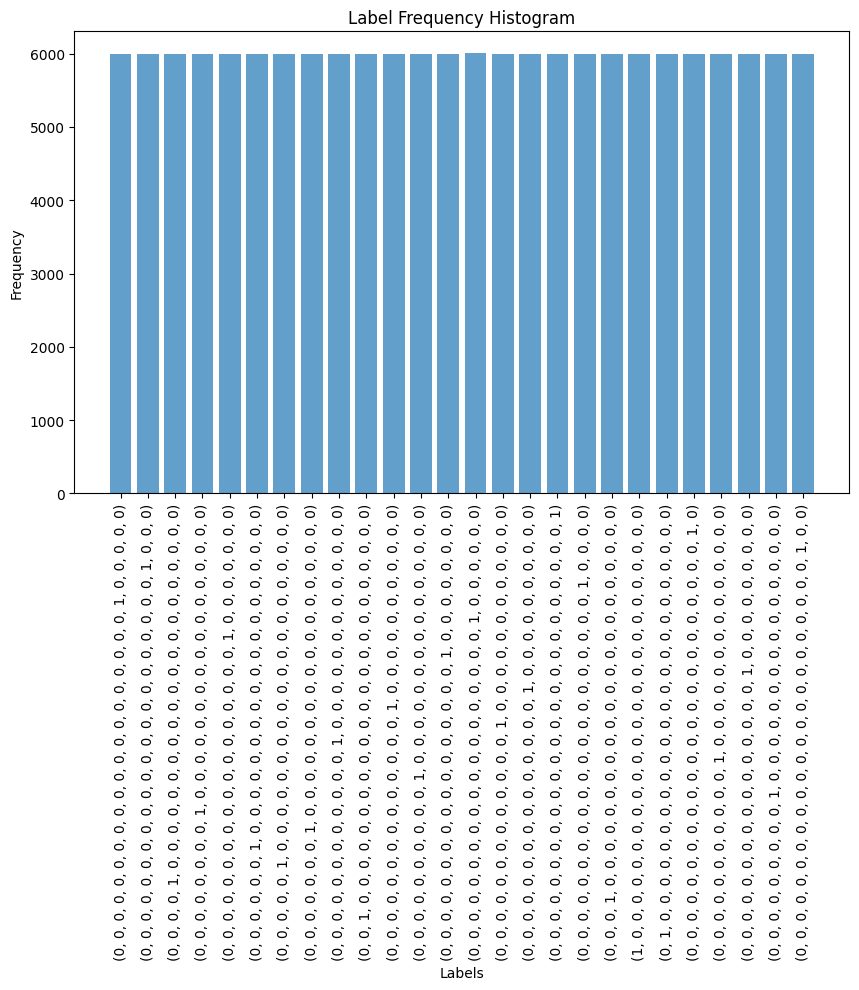

In [ ]:
# frequency of each class after over sampling
Processor.frequency_histogram()

In [ ]:
# update X_test, y_test
X_train, y_train = Processor.X, Processor.y

I have done similiar process with X_val, y_val datasets

In [ ]:
# data balance check in X_val and y_val
Processor = DataProcessor(X_val, y_val, 26, 1700, DataAugmentor())
Processor.data_info()

(37792, 28, 28)
(37792, 26)


True

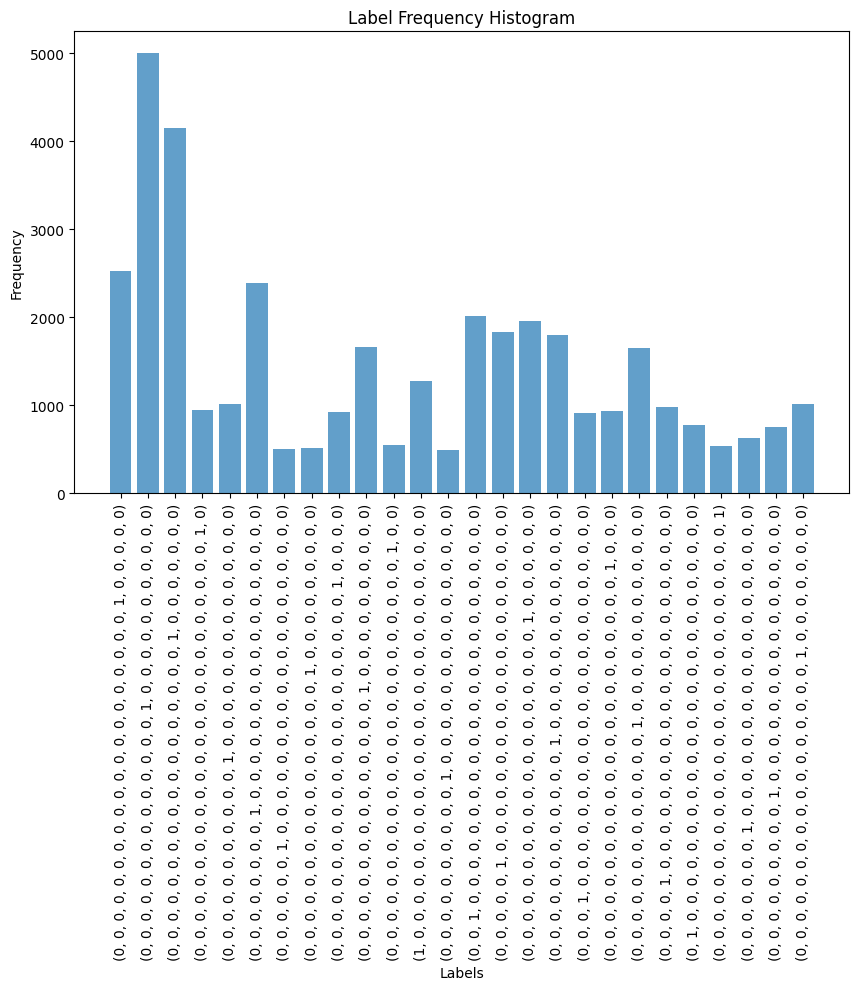

In [ ]:
# initial frequency of each class
Processor.frequency_histogram()

In [ ]:
# under sampling to threshold value = 1700
Processor.under_sample()
Processor.data_info()

(29711, 28, 28)
(29711, 26)


True

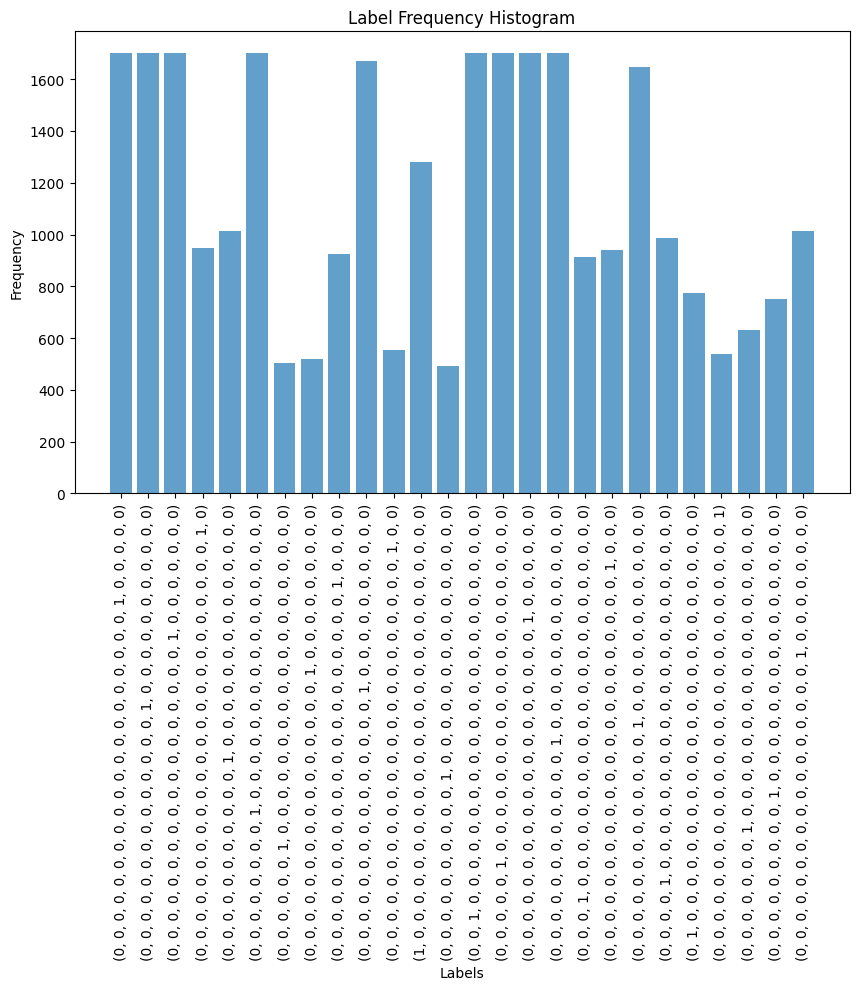

In [ ]:
# frequency of each class after under sampling
Processor.frequency_histogram()

In [ ]:
# over sampling to threshold value = 1700
Processor.over_sample()
Processor.data_info()

(44200, 28, 28)
(44200, 26)


True

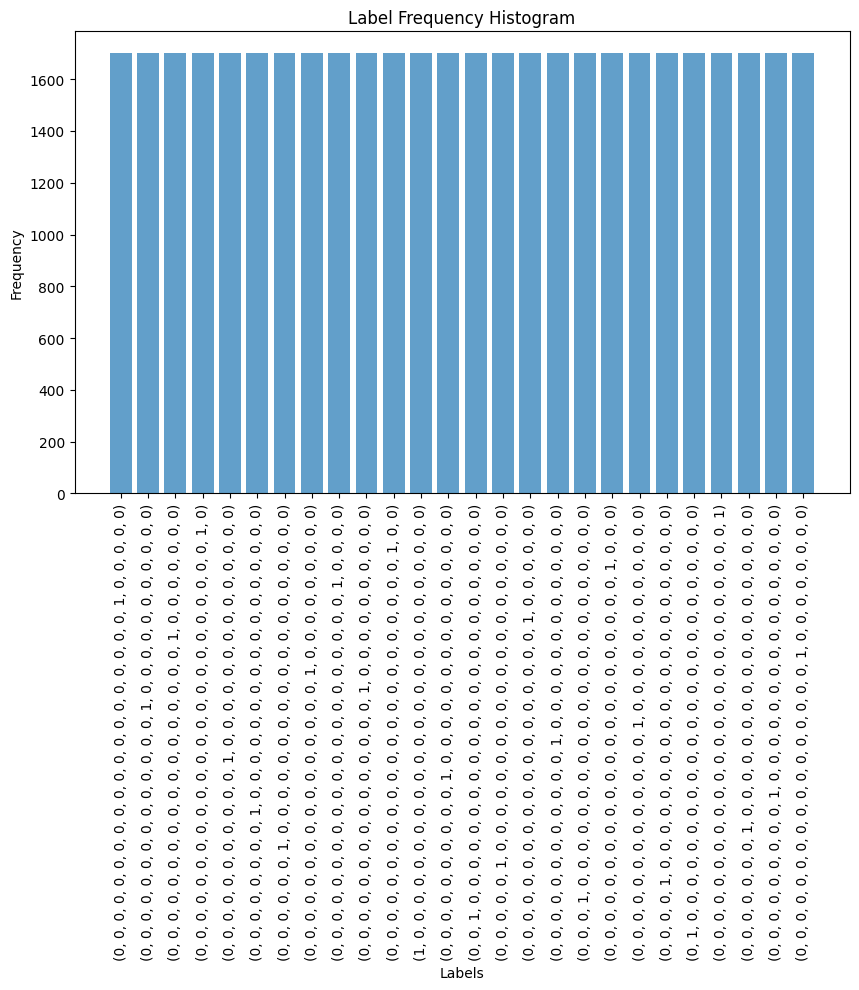

In [ ]:
# frequency of each class after over sampling
Processor.frequency_histogram()

In [ ]:
# update X_val, y_val
X_val, y_val = Processor.X, Processor.y

## Convulutional Neural Network Model

The Convolutional Neural Network implemented for this project utilizes three convolutional layers with max-pooling, followed by two dense layers for letter classification. Unlike typical approaches, the model was trained on non-normalized data because, surprisingly, it showed better results. Regularization techniques, including L2 regularization, were applied to prevent overfitting during training.

In [ ]:
# model definition
CNN = CnnModel(X_train, y_train, X_val, y_val, X_test)
CNN.create_model()
CNN.model_summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 16)          4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 16)          0

In [ ]:
# model training
CNN.train_model()

Epoch 1/5
9448/9448 [==============================] - 144s 15ms/step - loss: 1.0772 - accuracy: 0.7582 - val_loss: 0.5486 - val_accuracy: 0.8907
Epoch 2/5
9448/9448 [==============================] - 141s 15ms/step - loss: 0.5116 - accuracy: 0.8992 - val_loss: 0.4788 - val_accuracy: 0.9097
Epoch 3/5
9448/9448 [==============================] - 141s 15ms/step - loss: 0.4756 - accuracy: 0.9066 - val_loss: 0.4463 - val_accuracy: 0.9169
Epoch 4/5
9448/9448 [==============================] - 141s 15ms/step - loss: 0.4555 - accuracy: 0.9099 - val_loss: 0.4417 - val_accuracy: 0.9151
Epoch 5/5
9448/9448 [==============================] - 141s 15ms/step - loss: 0.4402 - accuracy: 0.9115 - val_loss: 0.4365 - val_accuracy: 0.9140



The model exhibited strong performance on both the training and evaluation data sets,0.9115 and 0.9140 respecitvelys.

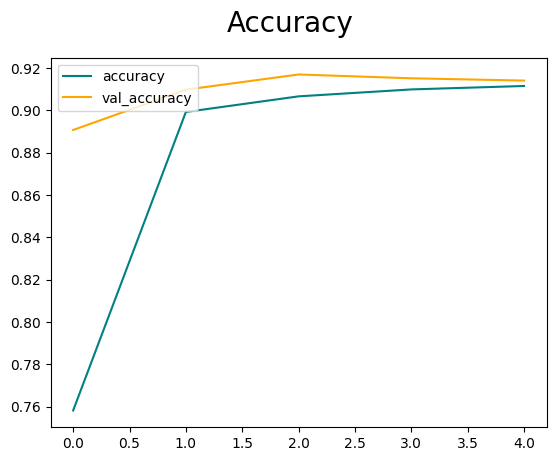

In [ ]:
# model accuracy plot
CNN.accuracy_plot()

In [ ]:
# model save
CNN.save_model()

1/1 [==============================] - 0s 54ms/step
Predicted P


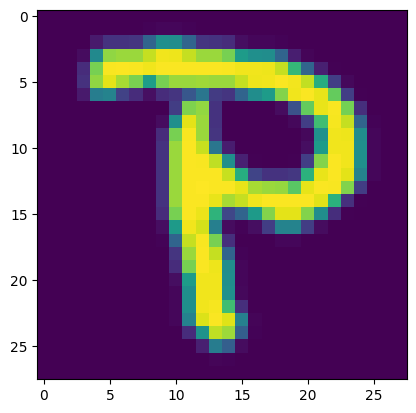

In [ ]:
# model quality check
CNN.check_quality()

In [ ]:
# model quantiative quality check, sample_submission.csv
CNN.check_quantitative_quality('sample_submission.csv')

## Convulutional Neural Network Model with normalized data

Below, I created a model trained on normalized data to demonstrate its performance.

In [ ]:
X_train = X_train.astype(float) / 255.0

X_val = X_val.astype(float) / 255.0

X_test = X_test.astype(float) / 255.0

In [ ]:
CNN_2 = CnnModel(X_train, y_train, X_val, y_val, X_test)
CNN_2.create_model()

In [ ]:
CNN_2.train_model()

Epoch 1/5
9448/9448 [==============================] - 112s 12ms/step - loss: 1.1668 - accuracy: 0.7584 - val_loss: 0.8854 - val_accuracy: 0.8458
Epoch 2/5
9448/9448 [==============================] - 100s 11ms/step - loss: 0.8842 - accuracy: 0.8399 - val_loss: 0.8100 - val_accuracy: 0.8588
Epoch 3/5
9448/9448 [==============================] - 97s 10ms/step - loss: 0.8152 - accuracy: 0.8547 - val_loss: 0.7621 - val_accuracy: 0.8670
Epoch 4/5
9448/9448 [==============================] - 101s 11ms/step - loss: 0.7743 - accuracy: 0.8616 - val_loss: 0.7428 - val_accuracy: 0.8693
Epoch 5/5
9448/9448 [==============================] - 126s 13ms/step - loss: 0.7409 - accuracy: 0.8688 - val_loss: 0.7305 - val_accuracy: 0.8693


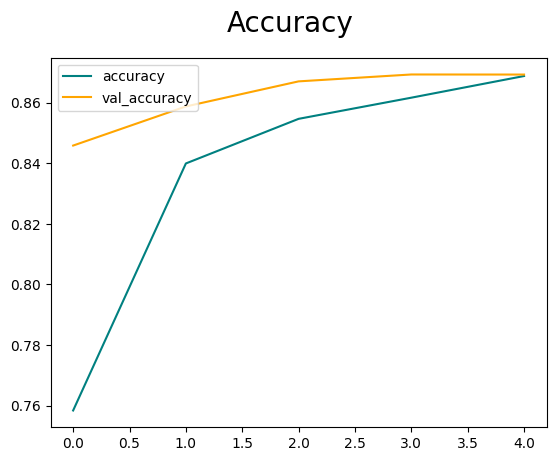

In [ ]:
CNN_2.accuracy_plot()

Model performance on normalized data is about 3/4% worse.

## Convulutional Neural Network Model with initial data

In the end, I chose to train the model using the original, unprocessed data to evaluate its effectiveness. This decision aimed to determine the necessity of my data preprocessing steps, providing valuable insights into their impact on the model's performance.

In [13]:
# datasets
X_train = np.load('C:\\Users\\mikol\\Downloads\\X_train.npy.zip')
y_train = np.load('C:\\Users\\mikol\\Downloads\\y_train.npy.zip')
X_val = np.load('C:\\Users\\mikol\\Downloads\\X_val.npy.zip')
y_val = np.load('C:\\Users\\mikol\\Downloads\\y_val.npy')
X_test = np.load('C:\\Users\\mikol\\Downloads\\X_test.npy.zip')

y_train = y_train['y_train']
X_train = X_train['X_train']

y_val = y_val
X_val = X_val['X_val']

X_test = X_test['X_test']

In [5]:
CNN_3 = CnnModel(X_train, y_train, X_val, y_val, X_test)
CNN_3.create_model()

In [6]:
CNN_3.train_model()

Epoch 1/5
9448/9448 [==============================] - 96s 10ms/step - loss: 1.0377 - accuracy: 0.7800 - val_loss: 0.5155 - val_accuracy: 0.9032
Epoch 2/5
9448/9448 [==============================] - 94s 10ms/step - loss: 0.5064 - accuracy: 0.9000 - val_loss: 0.4596 - val_accuracy: 0.9147
Epoch 3/5
9448/9448 [==============================] - 95s 10ms/step - loss: 0.4719 - accuracy: 0.9060 - val_loss: 0.4485 - val_accuracy: 0.9162
Epoch 4/5
9448/9448 [==============================] - 94s 10ms/step - loss: 0.4560 - accuracy: 0.9096 - val_loss: 0.4399 - val_accuracy: 0.9163
Epoch 5/5
9448/9448 [==============================] - 96s 10ms/step - loss: 0.4474 - accuracy: 0.9111 - val_loss: 0.4241 - val_accuracy: 0.9184


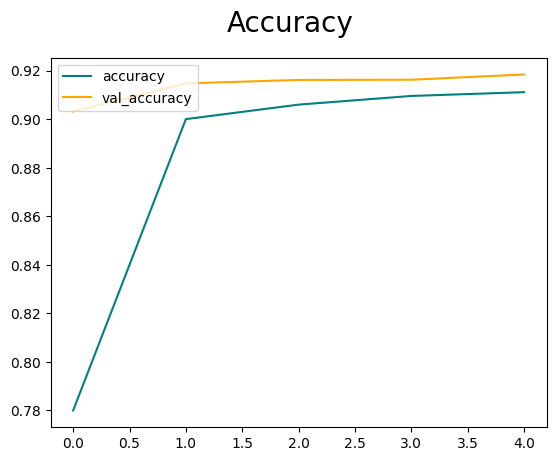

In [7]:
CNN_3.accuracy_plot()

The model trained on the initial data had similar accuracy to the model trained on preprocessed data. I decided to evaluate how the model will perform on the test data.

In [8]:
CNN_3.check_quantitative_quality('sample_submission_2.csv')

Predictions saved in sample_submission_2.csv
